In [49]:
from IPython.core.display import HTML
HTML(filename='titanic.html')

1) Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical.

In [50]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats, integrate


In [51]:
# Acquiring and Randomly sorting data

df=pd.read_excel(open('titanic.xls','rb'))

df.sample(10)

pclass  survived                                             name  \
535        2         0                      Phillips, Mr. Escott Robert   
1062       3         0                    Nilsson, Mr. August Ferdinand   
440        2         1                 Herman, Mrs. Samuel (Jane Laver)   
619        3         0                           Allum, Mr. Owen George   
46         1         0                            Cairns, Mr. Alexander   
160        1         1  Hippach, Mrs. Louis Albert (Ida Sophia Fischer)   
912        3         0                                Karaic, Mr. Milan   
788        3         0                               Ekstrom, Mr. Johan   
1305       3         0                            Zabour, Miss. Thamine   
90         1         1             Davidson, Mrs. Thornton (Orian Hays)   

         sex   age  sibsp  parch       ticket     fare cabin embarked boat  \
535     male  43.0      0      1  S.O./P.P. 2  21.0000   NaN        S  NaN   
1062    male  21.0      0      0       350410   7.8542   NaN        S  NaN   
440   female  48.0      1      2       220845  65.0000   NaN        S    9   
619     male  18.0      0      0         2223   8.3000   NaN        S  NaN   
46      male   NaN      0      0       113798  31.0000   NaN        S  NaN   
160   female  44.0      0      1       111361  57.9792   B18        C    4   
912     male  30.0      0      0       349246   7.8958   NaN        S  NaN   
788     male  45.0      0      0       347061   6.9750   NaN        S  NaN   
1305  female   NaN      1      0         2665  14.4542   NaN        C  NaN   
90    female  27.0      1      2   F.C. 12750  52.0000   B71        S    3   

       body                      home.dest  
535     NaN              Ilfracombe, Devon  
1062    NaN                            NaN  
440     NaN   Somerset / Bernardsville, NJ  
619   259.0  Windsor, England New York, NY  
46      NaN                            NaN  
160     NaN                    Chicago, IL  
912     NaN                            NaN  
788     NaN              Effington Rut, SD  
1305    NaN                            NaN  
90      NaN                   Montreal, PQ

In [52]:
#Number of unique values in each column
df.apply(lambda x: len(x.unique())) 

pclass          3
survived        2
name         1307
sex             2
age            99
sibsp           7
parch           8
ticket        939
fare          282
cabin         187
embarked        4
boat           29
body          122
home.dest     370
dtype: int64

In [53]:
#Types of column
df.dtypes


pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [54]:
#Overll summary of categorical variables
df.describe(exclude=[np.number])

name   sex    ticket        cabin embarked boat  \
count                   1309  1309      1309          295     1307  486   
unique                  1307     2       939          186        3   28   
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S   13   
freq                       2   843        11            6      914   39   

           home.dest  
count            745  
unique           369  
top     New York, NY  
freq              64

In [55]:
#Overll summary of numerical variables
df.describe(exclude=['O']).round(2)

pclass  survived      age    sibsp    parch     fare    body
count  1309.00   1309.00  1046.00  1309.00  1309.00  1308.00  121.00
mean      2.29      0.38    29.88     0.50     0.39    33.30  160.81
std       0.84      0.49    14.41     1.04     0.87    51.76   97.70
min       1.00      0.00     0.17     0.00     0.00     0.00    1.00
25%       2.00      0.00    21.00     0.00     0.00     7.90   72.00
50%       3.00      0.00    28.00     0.00     0.00    14.45  155.00
75%       3.00      1.00    39.00     1.00     0.00    31.28  256.00
max       3.00      1.00    80.00     8.00     9.00   512.33  328.00

In [56]:
#Number of null values in each column
df.isnull().sum() 

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

2) Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.

We can see that the Age, Cabin, boat, fare, embarked, body  and home.dest and Embarked columns have missing entries.  I will need to find a way to populate or drop the missing values of the associated columns.

<h2>2.1 Missing values of Age column</h2>


In [57]:
df["age"].isnull().sum()


263

There are missing entries in this column. The easiest option could be just drop the rows with missing values or filling them up with 0. But since it is 263 values that are missing here, throwing them off is not a logical option. On the other hand, age can not be 0. The next alternative is to fill them up with median or mean. Yet in order to decide which estimation option is logical in current context, we need to visualize the distribution of the data first

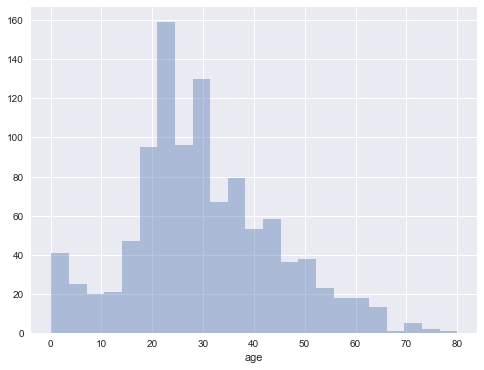

In [58]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(8, 6))

sns.distplot(df['age'].dropna(),  kde=False)


From the histogram, It is clear that ages between 20 and 30 are the most common, so filling in missing values with  median would be more reasonable.

In [59]:
new_age= df['age'].fillna(df['age'].median())
df["age"] = new_age
df["age"].describe()


count    1309.000000
mean       29.503183
std        12.905246
min         0.166700
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: age, dtype: float64

 let's look at the histogram again for a sanity check. The bar representing 28 is expected to be much taller this time.

In [60]:
df['age'].median()

28.0

In [61]:

f, ax = plt.subplots(figsize=(8, 6))

sns.distplot(df['age'],kde=False)
sns.plt.show()


Some of the ages that we imputed are probably way off, but it is still better than throwing entire records away.

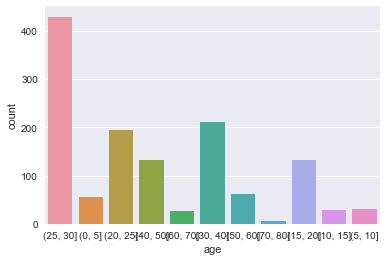

In [62]:
#transforming age variable
age_bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90]
df["age"] = pd.cut(df["age"], bins=age_bins).astype(object)

sns.countplot(df['age'])
sns.plt.show()

<h2>2.2 Missing values of Cabins</h2>

The "Women and children first" policy is usuall enforced differently on the port and starboard side of the ship, so the side of the cabin could be a useful predictor in our analysis. We assumed that Cabin numbers ending with odd numbers indicate that the cabin was on starboard side and cabins ending with even number were located on the port side. Let's create a feature called CabinSide that takes the values unknown, starboard or port.

In [63]:

df["cabin_location"] = "Unknown"
#Odd numbered cabins are starboard side, and even numbers are port side.
df.loc[pd.notnull(df["cabin"]) & df["cabin"].str[-1].isin(["1", "3", "5", "7", "9"]),"cabin_location"] = "Starboard"
df.loc[pd.notnull(df["cabin"]) & df["cabin"].str[-1].isin(["0", "2", "4", "6", "8"]),"cabin_location"] = "Port"
df["cabin_location"].head()

0    Starboard
1         Port
2         Port
3         Port
4         Port
Name: cabin_location, dtype: object

In [64]:
df['ticket'][(df["ticket"]=="PC 17608")]

35     PC 17608
66     PC 17608
249    PC 17608
250    PC 17608
251    PC 17608
252    PC 17608
253    PC 17608
Name: ticket, dtype: object

The Ryersons had four cabins, three on starboard and one on port. It is good to set them all on starboard, as they probably gathered. They traveled with ticket PC 17608, so we use that to index the rows of Ryersons & co.

In [65]:
df.loc[df["ticket"]=="PC 17608", "cabin_location"] = "Starboard"


In [66]:
df.cabin_location.value_counts()


Unknown      1019
Port          154
Starboard     136
Name: cabin_location, dtype: int64

<h2>2.2  Passenger Class</h2>

In [67]:
# Passenger class mapping to categorical 
Pclass_map = {1: '1st Class', 2: '2nd Class', 3: '3rd Class'}
df['pclass'] = df['pclass'].map(Pclass_map)
df['pclass'].sample(10)

1025    3rd Class
843     3rd Class
681     3rd Class
783     3rd Class
1301    3rd Class
1031    3rd Class
1173    3rd Class
861     3rd Class
11      1st Class
464     2nd Class
Name: pclass, dtype: object

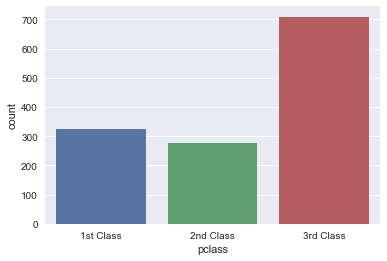

In [68]:

sns.countplot(df['pclass']);


<h2> 2.3 Embarkation Port </h2>

In [69]:
df_embark= pd.get_dummies(df['embarked'])

In [70]:
pd.value_counts(df['embarked'].isnull())


False    1307
True        2
Name: embarked, dtype: int64

0       S
1       S
2       S
3       S
4       S
5       S
6       S
7       S
8       S
9       C
10      C
11      C
12      C
13      S
14      S
15      S
16      C
17      C
18      C
19      C
20      S
21      S
22      C
23      C
24      S
25      C
26      C
27      C
28      S
29      S
       ..
1279    S
1280    S
1281    S
1282    S
1283    S
1284    S
1285    S
1286    C
1287    S
1288    S
1289    S
1290    S
1291    S
1292    S
1293    S
1294    S
1295    S
1296    S
1297    S
1298    S
1299    C
1300    C
1301    C
1302    C
1303    C
1304    C
1305    C
1306    C
1307    C
1308    S
Name: embarked, Length: 1309, dtype: object

In [71]:
# Replacing missing values with most common port
df.embarked[ df.embarked.isnull() ] = df.embarked.dropna().mode().values


/Users/adriaan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


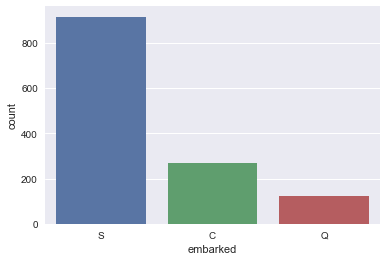

In [75]:
sns.countplot(df['embarked']);


<h2>2.4 Gender Feature</h2>

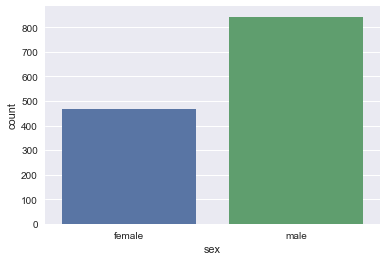

In [76]:
#transformation of gender column
genders = {"male": 1, "female": 0}
#df["sex"] = df["sex"].apply(lambda s: genders.get(s))
sns.countplot(df['sex']);

3) Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.


In [77]:
df["floor"] = "Unknown"
df.loc[pd.notnull(df["cabin"]), "floor"] = df["cabin"].str[0]
df["cabin"].head(5)

0         B5
1    C22 C26
2    C22 C26
3    C22 C26
4    C22 C26
Name: cabin, dtype: object

It is not what I expected, it requires cleaning again

In [79]:
df.loc[df.cabin.str.len() == 5,:]


pclass  survived                                        name     sex  \
605   3rd Class         1               Abelseth, Mr. Olaus Jorgensen    male   
873   3rd Class         0    Humblen, Mr. Adolf Mathias Nicolai Olsen    male   
941   3rd Class         1                       Krekorian, Mr. Neshan    male   
994   3rd Class         0                     Mardirosian, Mr. Sarkis    male   
1024  3rd Class         0                     Moen, Mr. Sigurd Hansen    male   
1122  3rd Class         1                           Peter, Miss. Anna  female   
1217  3rd Class         0  Soholt, Mr. Peter Andreas Lauritz Andersen    male   

           age  sibsp  parch  ticket     fare  cabin embarked boat   body  \
605   (20, 25]      0      0  348122   7.6500  F G63        S    A    NaN   
873   (40, 50]      0      0  348121   7.6500  F G63        S  NaN  120.0   
941   (20, 25]      0      0    2654   7.2292  F E57        C   10    NaN   
994   (25, 30]      0      0    2655   7.2292  F E46        C  NaN    NaN   
1024  (20, 25]      0      0  348123   7.6500  F G73        S  NaN  309.0   
1122  (25, 30]      1      1    2668  22.3583  F E69        C    D    NaN   
1217  (15, 20]      0      0  348124   7.6500  F G73        S  NaN    NaN   

               home.dest cabin_location floor  
605   Perkins County, SD      Starboard     F  
873                  NaN      Starboard     F  
941                  NaN      Starboard     F  
994                  NaN           Port     F  
1024                 NaN      Starboard     F  
1122                 NaN      Starboard     F  
1217                 NaN      Starboard     F

In [80]:
df.loc[pd.notnull(df["cabin"]) & (df.cabin.str.len() == 5), "floor"] = df["cabin"].str[2]

In [81]:
df.floor.value_counts()


Unknown    1014
C            94
B            65
D            46
E            44
A            22
F            14
G             9
T             1
Name: floor, dtype: int64

In [82]:
percent_passenger=100. * df.floor.value_counts() / len(df.floor)
percent_passenger

Unknown    77.463713
C           7.181054
B           4.965623
D           3.514133
E           3.361345
A           1.680672
F           1.069519
G           0.687548
T           0.076394
Name: floor, dtype: float64

In [83]:
 df['pclass'].count()

1309

In [84]:
percent_passenger=100. * df.floor.value_counts() / len(df.floor)
percent_passenger.round(2).astype(str) + '%'

Unknown    77.46%
C           7.18%
B           4.97%
D           3.51%
E           3.36%
A           1.68%
F           1.07%
G           0.69%
T           0.08%
Name: floor, dtype: object

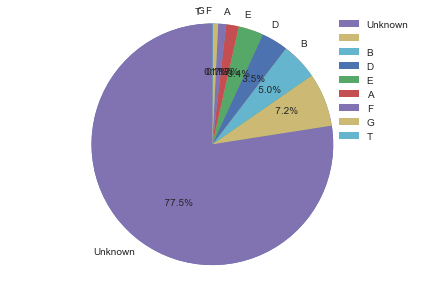

In [87]:
labels = 'Unknown', '', 'B','D','E','A','F','G','T'
plt.pie(percent_passenger,labels=labels, autopct='%10.1f%%',startangle=95)
patches, texts = plt.pie(percent_passenger, startangle=90)

plt.axis('equal')
plt.legend(patches, labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()
plt.show()

4) For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.

In [86]:
# Draw different classes's survive rate detail
class_sex_group = df['pclass'].where(df['survived']==1)
class_sex_survive_prec = class_sex_group.mean()
survival_by_class=100. * df.pclass.where(df['survived']==1).value_counts()/ len(df[df['survived']==1])
survival_by_class.round(2).astype(str) + '%'


TypeError: must be str, not int

In [88]:
# Drawing different classes's survive rate detail

labels = ['First Class', 
'Second class', 'Third class']
colors = ['lightcoral', 'gold', 'lightskyblue']



plt.pie(survival_by_class, colors=colors,autopct='%20.1f%%', startangle=90)
patches, texts = plt.pie(survival_by_class, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

NameError: name 'survival_by_class' is not defined

Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.


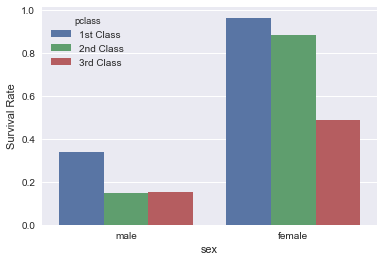

In [89]:
class_sex_group = df[['sex','pclass','survived']].groupby(['sex','pclass'],as_index=False)
class_sex_survive_prec = class_sex_group.mean()

fig = sns.barplot(data=class_sex_survive_prec, x='sex',y='survived',hue='pclass',order=['male','female'])
fig.axes.set_ylabel('Survival Rate')

plt.show()

Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.


In [90]:
#Transforming age feture
df['age_category'] = df['age'].apply(lambda x: "Child" if x <= 10 else "Adult")
df['age_category']=df.query('survived==1')['age_category']
df['age_category'].dropna().sample(5)

TypeError: unorderable types: Interval() <= int()

In [91]:
#Displaying result in dataframe
age_distribution= df.groupby(["age_category", "pclass","sex"]).agg({'age_category': lambda x: 100. *x.count()/len(df['age_category'])})
age_distribution.round(2).astype(str) + '%'

KeyError: 'age_category'